In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

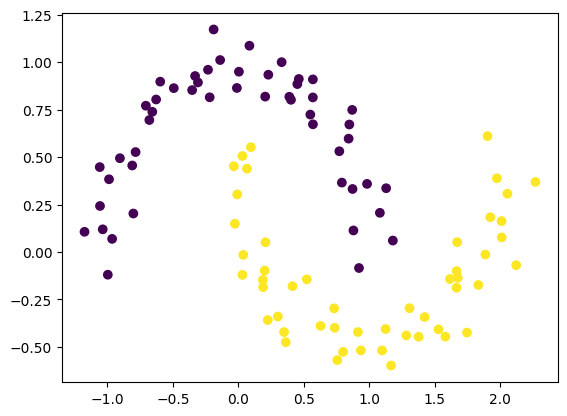

In [45]:
from sklearn.datasets import load_digits
digit=load_digits()

len(digit["data"][0])

digit.images[0]

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

data=make_moons()

X,y=make_moons(noise=0.1,random_state=42)
y
len(X)
plt.scatter(X[:,0],X[:,1],c=y)



In [46]:
from sklearn.datasets import make_blobs

X,y= make_blobs(centers=5, cluster_std=0.5, random_state=42)





In [47]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
n_sample=5000


X,y=make_circles(n_sample,noise=0.03,random_state=42)
X=np.array(X)
y=np.array(y)
X

array([[-0.75016489, -0.56389205],
       [ 0.78974434,  0.12875006],
       [ 0.74764022,  0.3065477 ],
       ...,
       [ 0.08857395,  0.84781275],
       [-0.76354876, -0.02878492],
       [-0.57873523,  0.84304373]])

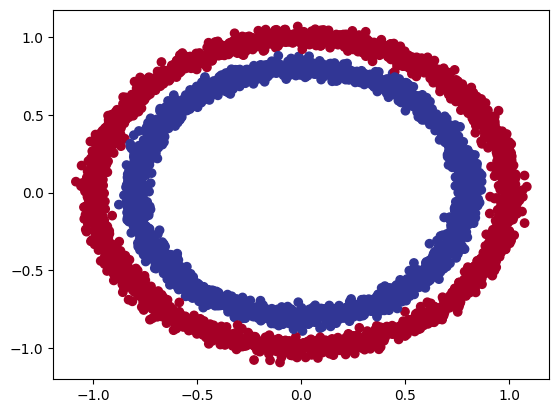

In [48]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [49]:
import torch
from torch import nn
device="cpu"

In [50]:
class CircleModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=5)
        self.layer2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer2(self.layer1(x))

model0=CircleModel0().to(device=device)
model0


CircleModel0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [51]:
model0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model0

model00=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)

)
model00.state_dict()



OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])

In [52]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:


class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=5)
        self.layer2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer2(self.layer1(x))

model0=CircleModel0().to(device)
model0


untrained_preds = model00(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

firstRESULT=model00(X_test)
firstRESULT

loss=nn.BCEWithLogitsLoss()


# optimizer=torch.optim.SGD(params=model00.parameters(), lr=0.1)

optimizer = torch.optim.SGD(model00.parameters(), 
                            lr=0.01)


Length of predictions: 1000, Shape: torch.Size([1000, 1])
Length of test samples: 1000, Shape: torch.Size([1000])

First 10 predictions:
tensor([[0.4289],
        [0.3478],
        [0.1384],
        [0.2301],
        [0.4228],
        [0.0042],
        [0.4187],
        [0.1223],
        [0.4699],
        [0.2026]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 0., 0., 1., 1., 0., 1., 1., 0., 1.])


In [55]:
loss=nn.BCEWithLogitsLoss()


# optimizer=torch.optim.SGD(params=model00.parameters(), lr=0.1)

optimizer = torch.optim.SGD(model00.parameters(), 
                            lr=0.01)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [56]:
def accuracy(y_pred,y_true):
    correct=torch.eq(y_true,y_pred).sum().item()
    return (correct/len(y_pred))*100



res=model00(X_test.to(device))

# accuracy(y_test,res)
res




tensor([[ 4.2890e-01],
        [ 3.4776e-01],
        [ 1.3841e-01],
        [ 2.3006e-01],
        [ 4.2283e-01],
        [ 4.2153e-03],
        [ 4.1869e-01],
        [ 1.2227e-01],
        [ 4.6989e-01],
        [ 2.0256e-01],
        [ 1.1916e-01],
        [ 3.2595e-01],
        [ 4.5715e-01],
        [ 4.2443e-01],
        [ 3.0668e-01],
        [-7.7808e-03],
        [ 3.3576e-01],
        [ 7.5369e-02],
        [ 6.7059e-02],
        [ 7.5649e-02],
        [ 6.1368e-02],
        [ 3.8820e-01],
        [ 2.4859e-01],
        [ 3.3080e-01],
        [ 7.7527e-02],
        [ 2.9358e-02],
        [ 1.8192e-01],
        [-1.9744e-02],
        [ 1.9800e-01],
        [ 4.6376e-01],
        [-2.1405e-02],
        [ 4.3589e-01],
        [ 3.3231e-02],
        [ 1.8333e-01],
        [ 6.1702e-03],
        [ 4.1477e-01],
        [ 4.1157e-01],
        [ 3.8957e-01],
        [ 1.0798e-01],
        [ 2.7963e-01],
        [ 5.0302e-02],
        [ 3.1330e-02],
        [ 2.1557e-01],
        [ 3

In [57]:
y_logits = model00(X_test.to(device))[:5]
y_logits

tensor([[0.4289],
        [0.3478],
        [0.1384],
        [0.2301],
        [0.4228]], grad_fn=<SliceBackward0>)

In [58]:
y_preds= torch.round(torch.sigmoid(y_logits))

y_test

torch.eq(y_test,y_preds)

y_test.shape
y_logits.shape

y_logits.squeeze().shape,y_test.squeeze().shape

y_test.unsqueeze(dim=1).shape

y_logits=model0(X_train).squeeze()
y_logits.shape
torch.sigmoid(y_logits).shape
# y_pred=torch.round(torch.sigmoid(y_logits))
# y_pred.shape

torch.Size([4000])

In [59]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


In [60]:



torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model0.train()
    
    # Forward pass
    y_logits = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # Calculate the loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  # <-- this was missing
    
    # Evaluation
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print progress
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train loss: {loss.item():.4f} | Train acc: {acc:.2f}% | "
              f"Test loss: {test_loss.item():.4f} | Test acc: {test_acc:.2f}%")



    
    
 

Epoch 1/100 | Train loss: 0.7042 | Train acc: 47.52% | Test loss: 0.7057 | Test acc: 48.10%
Epoch 10/100 | Train loss: 0.7002 | Train acc: 48.45% | Test loss: 0.6998 | Test acc: 49.00%
Epoch 20/100 | Train loss: 0.6982 | Train acc: 48.73% | Test loss: 0.6969 | Test acc: 49.80%
Epoch 30/100 | Train loss: 0.6971 | Train acc: 49.12% | Test loss: 0.6955 | Test acc: 49.00%
Epoch 40/100 | Train loss: 0.6963 | Train acc: 49.02% | Test loss: 0.6947 | Test acc: 49.40%
Epoch 50/100 | Train loss: 0.6958 | Train acc: 49.20% | Test loss: 0.6943 | Test acc: 49.70%
Epoch 60/100 | Train loss: 0.6953 | Train acc: 48.85% | Test loss: 0.6940 | Test acc: 49.00%
Epoch 70/100 | Train loss: 0.6950 | Train acc: 48.90% | Test loss: 0.6938 | Test acc: 49.30%
Epoch 80/100 | Train loss: 0.6947 | Train acc: 48.98% | Test loss: 0.6937 | Test acc: 49.10%
Epoch 90/100 | Train loss: 0.6945 | Train acc: 48.77% | Test loss: 0.6937 | Test acc: 49.00%
Epoch 100/100 | Train loss: 0.6944 | Train acc: 48.77% | Test loss: 0.6

In [61]:
y_pred=torch.round(torch.sigmoid(y_logits))
y_pred.shape


torch.Size([4000])

In [62]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


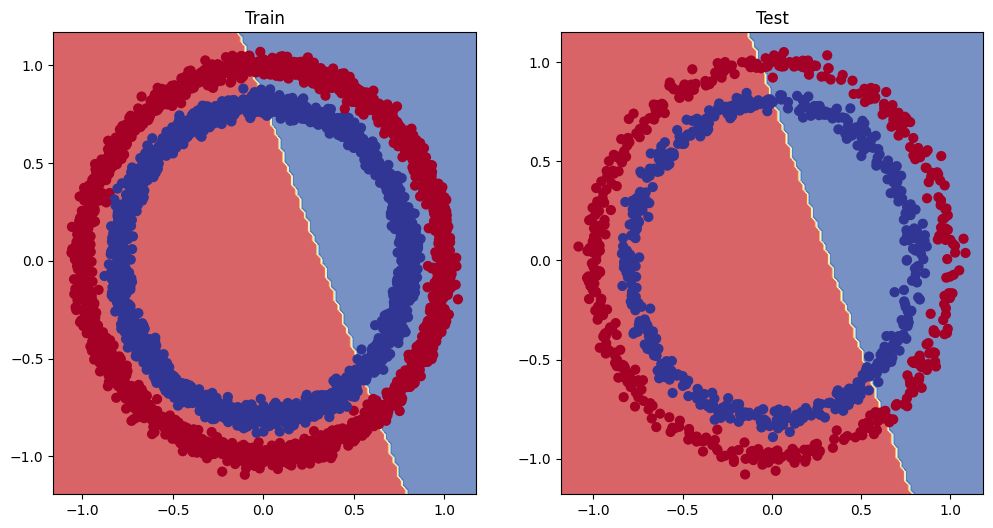

In [63]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

In [64]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=10)
        self.layer2=nn.Linear(in_features=10,out_features=20)
        self.layer3=nn.Linear(in_features=20,out_features=1)

    def forward(self,x):
        return self.layer3(self.layer2(self.layer1(x)))

model1=CircleModelV1()
model1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
)

In [65]:
loss=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.01)



 EPOCHS-> 0 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 100 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 200 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 300 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 400 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 500 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 600 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 700 | Train Accuracy| 47.425 | Train loss 0.6931344866752625 | test accuracy 45.6 | test_loss0.6940990090370178
 EPOCHS-> 800 | Train Accu

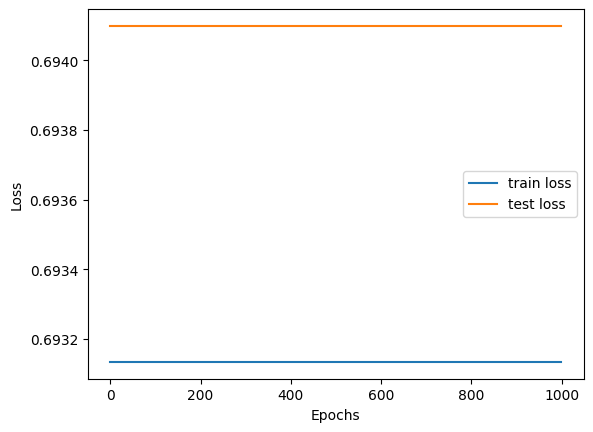

In [92]:
epochs=1000
loss_train=[]
loss_test=[]

for i in range(epochs):
    model1.train()
    #forward pass
    y_logits=model1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    #calculate the loss
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train, y_pred=y_pred)
    #optmizer zero grad
    loss_train.append(loss.item())

    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #step step....
    optimizer.step()

    model1.eval()
    with torch.inference_mode():
        y_logits_test=model1(X_test).squeeze()
        y_pred_test=torch.round(torch.sigmoid(y_logits_test))
        #calculate the loss
        loss2=loss_fn(y_logits_test,y_test)
        acc2=accuracy_fn(y_true=y_test, y_pred=y_pred_test)
        #optmizer zero grad
        loss_test.append(loss2.item())
    
        # optimizer.zero_grad()
        # #loss backward
        # loss.backward()
        # #step step....
        # optimizer.step()
        
    if i%100==0:
        print(f" EPOCHS-> {i} | Train Accuracy| {acc} | Train loss {loss} | test accuracy {acc2} | test_loss{ loss2}")


plt.plot(range(epochs),loss_train,label="train loss")
plt.plot(range(epochs),loss_test,label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [99]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.relu = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear()

In [100]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [107]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

loss_train=[]
loss_test=[]

acc_tr=[]
acc_te=[]


# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    loss_train.append(loss.item())
    acc_tr.append(acc)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
      loss_test.append(test_loss.item())
      acc_te.append(test_acc)
        

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.04537, Accuracy: 99.72% | Test Loss: 0.04827, Test Accuracy: 99.70%
Epoch: 100 | Loss: 0.04061, Accuracy: 99.78% | Test Loss: 0.04311, Test Accuracy: 99.70%
Epoch: 200 | Loss: 0.03683, Accuracy: 99.78% | Test Loss: 0.03905, Test Accuracy: 99.70%
Epoch: 300 | Loss: 0.03377, Accuracy: 99.78% | Test Loss: 0.03575, Test Accuracy: 99.70%
Epoch: 400 | Loss: 0.03125, Accuracy: 99.78% | Test Loss: 0.03306, Test Accuracy: 99.70%
Epoch: 500 | Loss: 0.02913, Accuracy: 99.78% | Test Loss: 0.03080, Test Accuracy: 99.80%
Epoch: 600 | Loss: 0.02733, Accuracy: 99.80% | Test Loss: 0.02889, Test Accuracy: 99.80%
Epoch: 700 | Loss: 0.02579, Accuracy: 99.80% | Test Loss: 0.02726, Test Accuracy: 99.80%
Epoch: 800 | Loss: 0.02444, Accuracy: 99.80% | Test Loss: 0.02585, Test Accuracy: 99.80%
Epoch: 900 | Loss: 0.02326, Accuracy: 99.83% | Test Loss: 0.02461, Test Accuracy: 99.80%


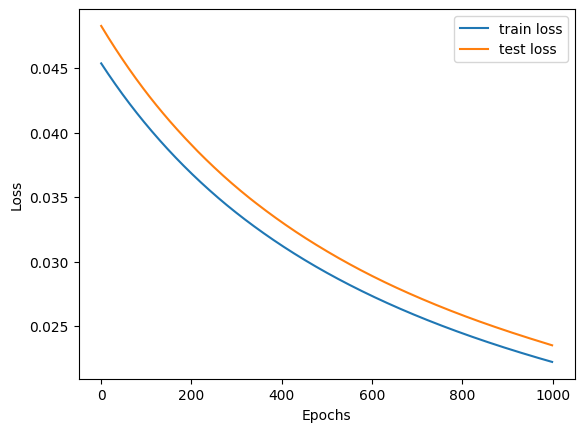

In [108]:
plt.plot(range(epochs),loss_train,label="train loss")
plt.plot(range(epochs),loss_test,label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

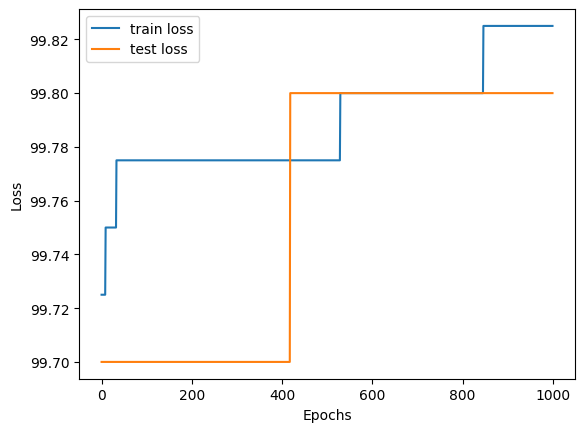

In [109]:
plt.plot(range(epochs),acc_tr,label="train loss")
plt.plot(range(epochs),acc_te,label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [119]:
len(X_train),len(X_test),len(y_train),len(y_test)

res=model_3(X_test)
res
torch.round(torch.sigmoid(res))[:5],y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.]], grad_fn=<SliceBackward0>),
 tensor([0., 0., 0., 1., 1.]))